In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hist_data = pd.read_csv('/content/historical_data.csv')
hist_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [ ]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

##Feature Creation

In [ ]:
hist_data['created_at'] = pd.to_datetime(hist_data['created_at'])
hist_data['actual_delivery_time'] = pd.to_datetime(hist_data['actual_delivery_time'])

In [ ]:
#Target variable for regression
from datetime import datetime
actual_total_delivery_duration = (hist_data['actual_delivery_time'] - hist_data['created_at'])
hist_data['actual_total_delivery_duration'] = actual_total_delivery_duration.dt.seconds

In [ ]:
hist_data['busy_dashers_ration'] = hist_data['total_busy_dashers']/hist_data['total_onshift_dashers']

In [ ]:
hist_data['estimated_non_prep_duration'] = hist_data['estimated_store_to_consumer_driving_duration'] + hist_data['estimated_order_place_duration']

In [ ]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

##Data Prep for modelling

In [ ]:
hist_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ration,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,1136.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,0.000000,1136.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,1.000000,735.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1.000000,1096.0


In [ ]:
hist_data.nunique()

market_id                                            6
created_at                                      180985
actual_delivery_time                            178110
store_id                                          6743
store_primary_category                              74
order_protocol                                       7
total_items                                         57
subtotal                                          8368
num_distinct_items                                  20
min_item_price                                    2312
max_item_price                                    2652
total_onshift_dashers                              172
total_busy_dashers                                 159
total_outstanding_orders                           281
estimated_order_place_duration                      98
estimated_store_to_consumer_driving_duration      1336
actual_total_delivery_duration                    7134
busy_dashers_ration                               4025
estimated_

In [ ]:
hist_data.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
actual_total_delivery_duration                      7
busy_dashers_ration                             19838
estimated_non_prep_duration 

In [ ]:
#OHE of order_protocal
order_protocol_dummies = pd.get_dummies(hist_data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('Order_protocol_')

In [ ]:
#OHE of market_id
market_id_dummies = pd.get_dummies(hist_data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')

In [ ]:
#filling missing values in store category using mode of store_id
store_id_unique = hist_data['store_id'].unique().tolist()
store_id_and_category = {store_id: hist_data[hist_data.store_id == store_id].store_primary_category.mode()
                          for store_id in store_id_unique}

In [ ]:
def fill(store_id):
  try:
    return store_id_and_category[store_id].values[0]
  except:
    return np.nan
hist_data['nan_free_store_primary_category'] = hist_data.store_id.apply(fill)

In [ ]:
#OHE of store primary category
store_primary_category_dummies = pd.get_dummies(hist_data.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')


In [ ]:
#droping colums
train_df = hist_data.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time','nan_free_store_primary_category','actual_total_delivery_duration'])

In [ ]:
train_df = pd.concat([train_df,order_protocol_dummies,market_id_dummies,store_primary_category_dummies],axis=1)

In [ ]:
train_df = train_df.astype('float32')
train_df.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,2.882352,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,1.503771,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df['busy_dashers_ration'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ration, dtype: float64

In [ ]:
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([ 0,  6,  7,  8, 10, 11, 12]),)

In [ ]:
train_df.replace([np.inf, -np.inf],np.nan,inplace = True)
train_df.dropna(inplace=True)

In [ ]:
train_df.shape

(176173, 100)

In [ ]:
corr  = train_df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

<Axes: >

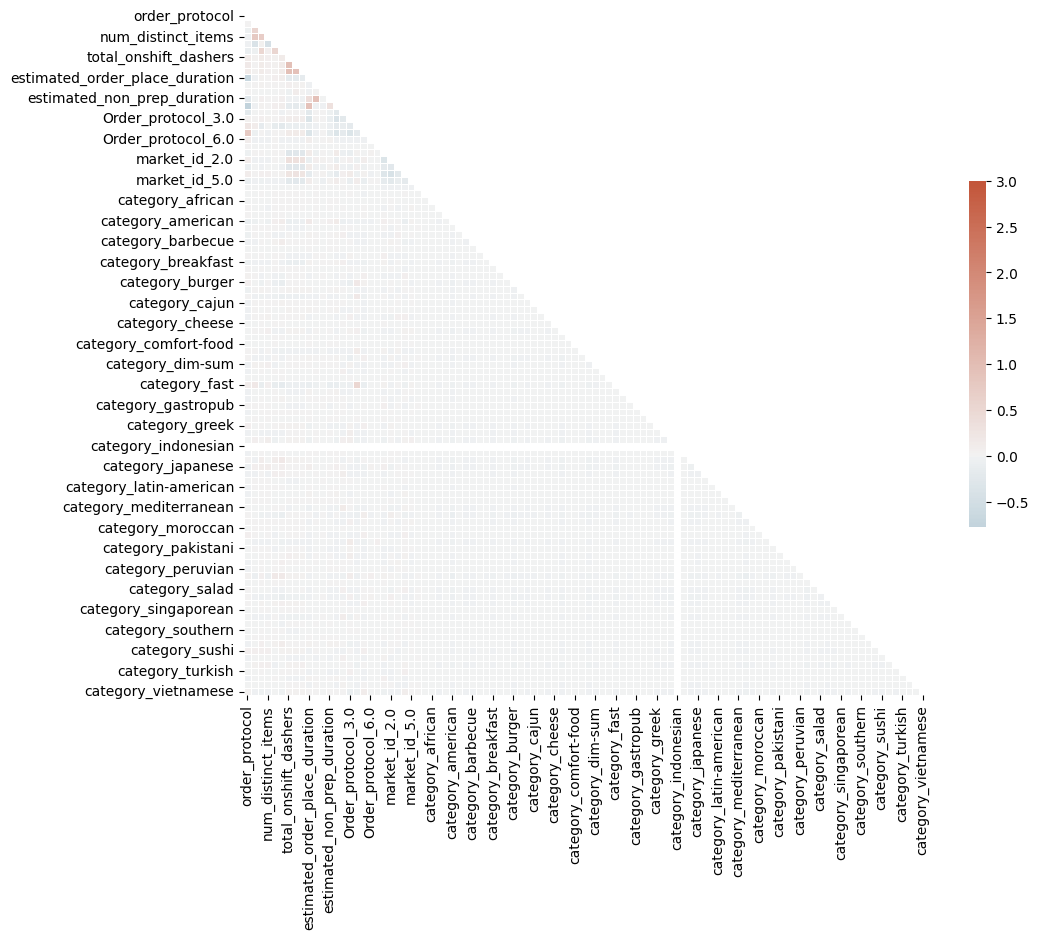

In [ ]:
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidths=0.5,cbar_kws={'shrink':0.5})

In [ ]:
train_df['category_indonesian'].describe()

count    176173.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

In [ ]:
def get_redundant_pairs(df):
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0,df.shape[1]):
    for j in range(0,i+1):
      pairs_to_drop.add((cols[i],cols[j]))
  return pairs_to_drop


In [ ]:
def get_top_correlations(df,n=5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
  return au_corr[0:n]


In [ ]:
print('Top absoute correlations')
print(get_top_correlations(train_df,20))

Top absoute correlations
total_onshift_dashers                         total_busy_dashers                0.941757
                                              total_outstanding_orders          0.934656
total_busy_dashers                            total_outstanding_orders          0.931313
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration       0.923068
estimated_order_place_duration                Order_protocol_1.0                0.900658
order_protocol                                Order_protocol_1.0                0.780826
                                              Order_protocol_5.0                0.768996
total_items                                   num_distinct_items                0.757864
order_protocol                                estimated_order_place_duration    0.687010
subtotal                                      num_distinct_items                0.682966
total_items                                   subtotal                          0.556

In [ ]:
train_df = hist_data.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time','order_protocol','nan_free_store_primary_category'])

In [ ]:
train_df = pd.concat([train_df,order_protocol_dummies,store_primary_category_dummies],axis=1)
train_df = train_df.drop(columns=['total_onshift_dashers','total_busy_dashers','category_indonesian','estimated_non_prep_duration'])
train_df = train_df.astype('float32')
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.shape

(177070, 90)

In [ ]:
def get_top_correlations(df,n=5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
  return au_corr[0:n]

print('Top absoute correlations')
print(get_top_correlations(train_df,20))


Top absoute correlations
estimated_order_place_duration                Order_protocol_1.0                0.897645
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
Order_protocol_4.0                            category_fast                     0.489946
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
Order_protocol_1.0                            Order_protocol_3.0                0.373581
estimated_order_place_duration                Order_protocol_3.0                0.364

In [ ]:
train_df = hist_data.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time','order_protocol','nan_free_store_primary_category'])

train_df = pd.concat([train_df,store_primary_category_dummies],axis=1)
train_df = train_df.drop(columns=['total_onshift_dashers','total_busy_dashers','category_indonesian','estimated_non_prep_duration'])

train_df = train_df.astype('float32')
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

print('Top absoute correlations')
print(get_top_correlations(train_df,20))

Top absoute correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.224065
subtotal                                      actual_total_delivery_duration    0.204511
total_outstanding_orders                      actual_total_delivery_duration    0.187416
                                              estimated_order_place_duration    0.171

##Feautre Engineering

In [ ]:
#new features
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']
train_df.drop(columns=['num_distinct_items','subtotal'], inplace=True)

print('Top absoute correlations')
print(get_top_correlations(train_df,20))

Top absoute correlations
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.224065
total_outstanding_orders                      actual_total_delivery_duration    0.187416
max_item_price                                percent_distinct_item_of_total    0.178

In [ ]:
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns=['max_item_price', 'min_item_price'], inplace=True)

print('Top absoute correlations')
print(get_top_correlations(train_df,20))

Top absoute correlations
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.224065
total_outstanding_orders                      actual_total_delivery_duration    0.187416
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158

In [ ]:
!python -m pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-543v63yq
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels /tmp/pip-req-build-543v63yq
  Resolved https://github.com/statsmodels/statsmodels to commit 01b19d7d111b29c183f620ff0a949ef6391ff8ee
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def compute_vif(features):
  vif_data = pd.DataFrame()
  vif_data['feature'] = features
  vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]

  return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [ ]:
features = train_df.drop(columns = ['actual_total_delivery_duration']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000371
1,category_chocolate,1.000498
2,category_belgian,1.000760
3,category_russian,1.003231
4,category_african,1.003823
...,...,...
76,busy_dashers_ration,6.369601
77,category_american,7.033604
78,estimated_store_to_consumer_driving_duration,7.210844
79,estimated_order_place_duration,13.472280


In [ ]:
multicoll = True

while multicoll:
  highest_vif_feature = vif_data['feature'].values.tolist()[-1]
  print('I will remove', highest_vif_feature)
  features.remove(highest_vif_feature)
  vif_data = compute_vif(features)
  multicoll = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove percent_distinct_item_of_total


,feature,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000369
2,category_belgian,1.000461
3,category_russian,1.002022
4,category_gluten-free,1.002372
...,...,...
75,category_american,4.505928
76,avg_price_per_item,5.958972
77,busy_dashers_ration,6.357889
78,estimated_store_to_consumer_driving_duration,7.192644


##Feature Selection - RF_reg & PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df[selected_features]
y = train_df['actual_total_delivery_duration']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

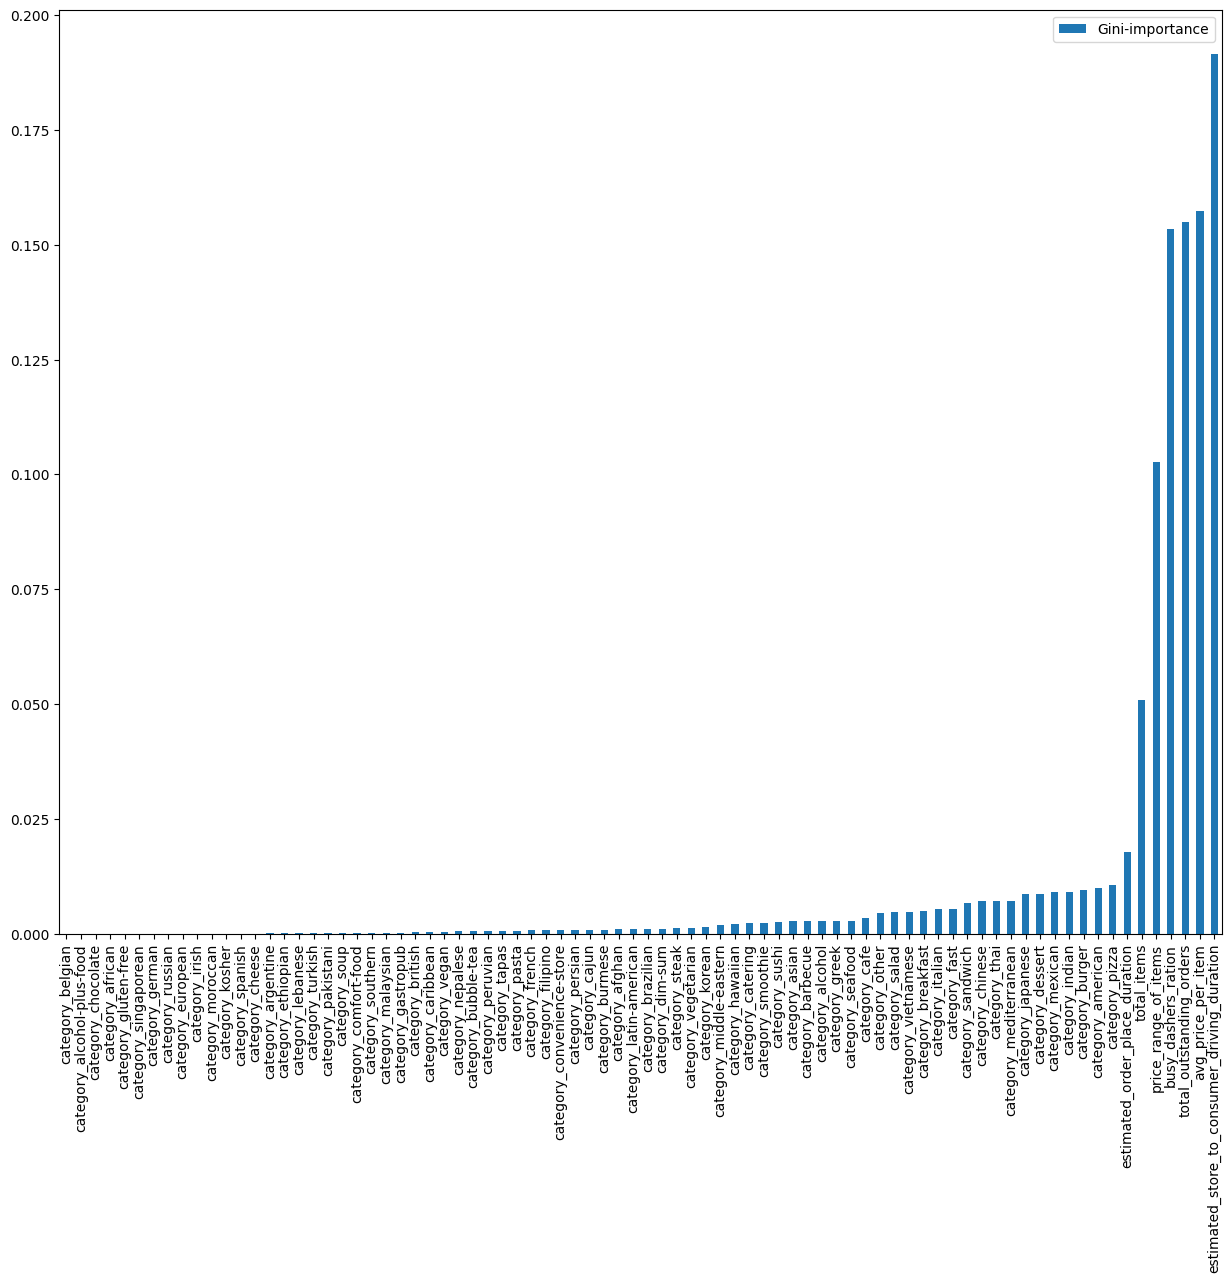

In [ ]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {}
for feature, importance in zip(X.columns, forest.feature_importances_):
  feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Gini-importance'})
importances.sort_values(by= 'Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

<ipython-input-44-09386b7392da>:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


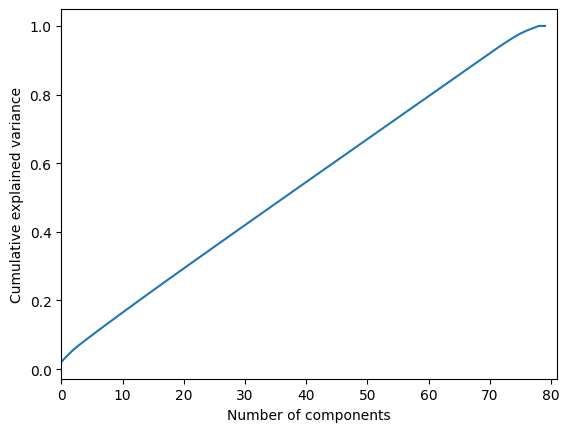

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train = X_train.values
X_Train = np.asarray(X_Train)

# Finding rormatised erray of X.tretn
X_std = StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
def scale(scaler, X,y):
  X_scaler = scaler
  X_scaler.fit(X=X,y=y)
  X_scaled = X_scaler.transform(X)
  y_scaler = scaler
  y_scaler.fit(y.values.reshape(-1,1))
  y_scaled = y_scaler.transform(y.values.reshape(-1,1))

  return X_scaled, y_scaled, X_scaler, y_scaler

In [ ]:
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(),X,y)

X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
  y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
  rsme_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
  print("error = "'{}'.format(rsme_error)+" in " + model_name)
  return rsme_error, y_predict

##Model Selection

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model

In [ ]:
def make_regression(X_train, y_train, X_test, y_test, model,model_name,verbose=True):
  model.fit(X_train,y_train)
  y_predict=model.predict(X_train)
  train_error = mean_squared_error(y_train,y_predict,squared=False)
  y_predict = model.predict(X_test)
  test_error = mean_squared_error(y_test,y_predict,squared=False)
  if verbose:
    print("Train error = "'{}'.format(train_error)+" in "+model_name)
    print("Test error = "'{}'.format(test_error)+" in "+model_name)
  trained_model = model
  return trained_model,y_predict,train_error,test_error

In [ ]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": [],
}

regression_models = {
    "Ridge" : linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost" :XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP":MLPRegressor(),
}

feature_sets = {
    "full dataset": X.columns.to_list(),
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

scalers = {
    "Standard sclaer": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}

for feature_set_name in feature_sets.keys():
  feature_set = feature_sets[feature_set_name]
  for scaler_name in scalers.keys():
    print(f"-----------sclaed with {scaler_name}-------------included columsn are {feature_set_name}")
    print("")
    for model_name in regression_models.keys():
      if scaler_name == "NotScale":
        X = train_df[feature_set]
        y = train_df['actual_total_delivery_duration']
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
        make_regression(X_train,y_train,X_test,y_test,regression_models[model_name],model_name,verbose=True)

      else:
        X_scaled,y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name],X[feature_set],y)
        X_train_scaled, X_test_scaled, y_train_scaled,y_test_scaled = train_test_split(
            X_scaled,y_scaled,test_size=0.2,random_state=42)
        _,y_predict_scaled,_,_ = make_regression(X_train_scaled,y_train_scaled[:,0],X_test_scaled,y_test_scaled[:,0],regression_models[model_name],model_name,verbose=True)
        rmse_error, y_predict = rmse_with_inv_transform(y_scaler,y_test,y_predict_scaled,model_name)
      pred_dict['regression_model'].append(model_name)
      pred_dict['feature_set'].append(feature_set_name)
      pred_dict['scaler_name'].append(scaler_name)
      pred_dict['RMSE'].append(rmse_error)


-----------sclaed with Standard sclaer-------------included columsn are full dataset

Train error = 0.9184321165084839 in Ridge
Test error = 0.9763144850730896 in Ridge
error = 1139.023193359375 in Ridge
Train error = 0.9152496352670425 in DecisionTree
Test error = 0.9819799988955717 in DecisionTree
error = 1145.6329120486123 in DecisionTree
Train error = 0.33920162602202747 in RandomForest
Test error = 0.9710713003641841 in RandomForest
error = 1132.9062130567793 in RandomForest
Train error = 0.8318288922309875 in XGBoost
Test error = 0.9501399993896484 in XGBoost
error = 1108.486572265625 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score -0.001591
Train error = 0.8727638310618053 in LGBM
Tes

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42528e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1071.4971923828125 in Ridge
Test error = 1139.0120849609375 in Ridge
Train error = 1067.7815291116704 in DecisionTree
Test error = 1145.632912356856 in DecisionTree
Train error = 397.9161627376233 in RandomForest
Test error = 1130.600577586711 in RandomForest
Train error = 968.2471313476562 in XGBoost
Test error = 1108.904296875 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1472
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score 2851.342096
Train error = 1017.5549840201221 in LGBM
Test error = 1104.9139100220425 in LGBM
Train error = 1057.1571044921875 in MLP
Test error = 1129.276123046875 in MLP
-----------sclaed with Standard sclaer-------------included columsn are selected_features_40

Train error = 0.9191697835922241 in Ridge


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55922e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1067.785563647774 in DecisionTree
Test error = 1144.3422391487907 in DecisionTree
Train error = 396.83885820359404 in RandomForest
Test error = 1131.437907352733 in RandomForest
Train error = 965.6858520507812 in XGBoost
Test error = 1107.650146484375 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score 2851.342096
Train error = 1017.1430421117441 in LGBM
Test error = 1105.337398353232 in LGBM


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1054.10791015625 in MLP
Test error = 1127.37060546875 in MLP
-----------sclaed with Standard sclaer-------------included columsn are selected_features_20

Train error = 0.921014130115509 in Ridge
Test error = 0.9788311123847961 in Ridge
error = 1141.959228515625 in Ridge
Train error = 0.9164098412967298 in DecisionTree
Test error = 0.9779147361917765 in DecisionTree
error = 1140.8901487012524 in DecisionTree
Train error = 0.34305650742186855 in RandomForest
Test error = 0.9694606282114914 in RandomForest
error = 1131.0271126116709 in RandomForest
Train error = 0.8281948566436768 in XGBoost
Test error = 0.9528855681419373 in XGBoost
error = 1111.689697265625 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.43857e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1069.1350906055598 in DecisionTree
Test error = 1140.8901487292646 in DecisionTree
Train error = 400.0253633981197 in RandomForest
Test error = 1132.1309097267363 in RandomForest
Train error = 966.1651000976562 in XGBoost
Test error = 1109.294677734375 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score 2851.342096
Train error = 1018.9600610110249 in LGBM
Test error = 1107.4333773746735 in LGBM
Train error = 1059.8843994140625 in MLP
Test error = 1132.91455078125 in MLP
-----------sclaed with Standard sclaer-------------included columsn are selected_features_10

Train error = 0.9229180216789246 in Ridge
Test error = 0.9802350997924805 in Ridge
error = 1143.5972900390625 in Ridge
Tr

In [ ]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full dataset,Standard sclaer,1139.023193
1,DecisionTree,full dataset,Standard sclaer,1145.632912
2,RandomForest,full dataset,Standard sclaer,1132.906213
3,XGBoost,full dataset,Standard sclaer,1108.486572
4,LGBM,full dataset,Standard sclaer,1104.636521
...,...,...,...,...
67,DecisionTree,selected_features_10,NotScale,1192.893311
68,RandomForest,selected_features_10,NotScale,1192.893311
69,XGBoost,selected_features_10,NotScale,1192.893311
70,LGBM,selected_features_10,NotScale,1192.893311


 **LGBM turns out to the best model with least error**



